In [71]:
#importing all required liabraries

import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#Sampling
from sklearn.utils import resample

#decomposition
from sklearn.decomposition import PCA

#pre-processing tools
from scipy import stats
from sklearn.utils import resample
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#ensemblib techniques
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC,SVR


#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold,cross_val_score



#feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif

#Cross validation
from sklearn.model_selection import GridSearchCV

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv(r"C:\Users\Ashish\Desktop\Datasets\Micro Credit Project\Data file.csv")

In [3]:
df=df1.copy()

In [4]:
#View all columns data of first 3 rows
with pd.option_context("display.max_columns",71,'display.max_colwidth',150):display(df.head(3))

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-08-19


In [73]:
#View all columns data of first 3 rows
with pd.option_context("display.max_columns",71,'display.max_colwidth',150):display(df.describe())

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


In [5]:
#modify the date column
df['pdate'] = pd.to_datetime(df['pdate'], errors='coerce')
df['Day'] = df['pdate'].dt.day
df['Month'] = df['pdate'].dt.month
df['Year'] = df['pdate'].dt.year

In [6]:
#drop the columns which not make any sence 'Unnamed: 0' , 'msisdn'
#drop 'pcircle' which is same for all
#drop 'pdate' because we already had make seperate date,month,year
df=df.drop(columns=['Unnamed: 0' , 'msisdn' , 'pcircle','pdate','Year'])

In [7]:
#columns
df.keys()

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month'],
      dtype='object')

In [8]:
#seperating target and independant variable
y=df['label']
x=df.drop(columns = ['label'])

In [9]:
#Shape of Target and Independant variable.
print(y.shape)
print(x.shape)

(209593,)
(209593, 34)


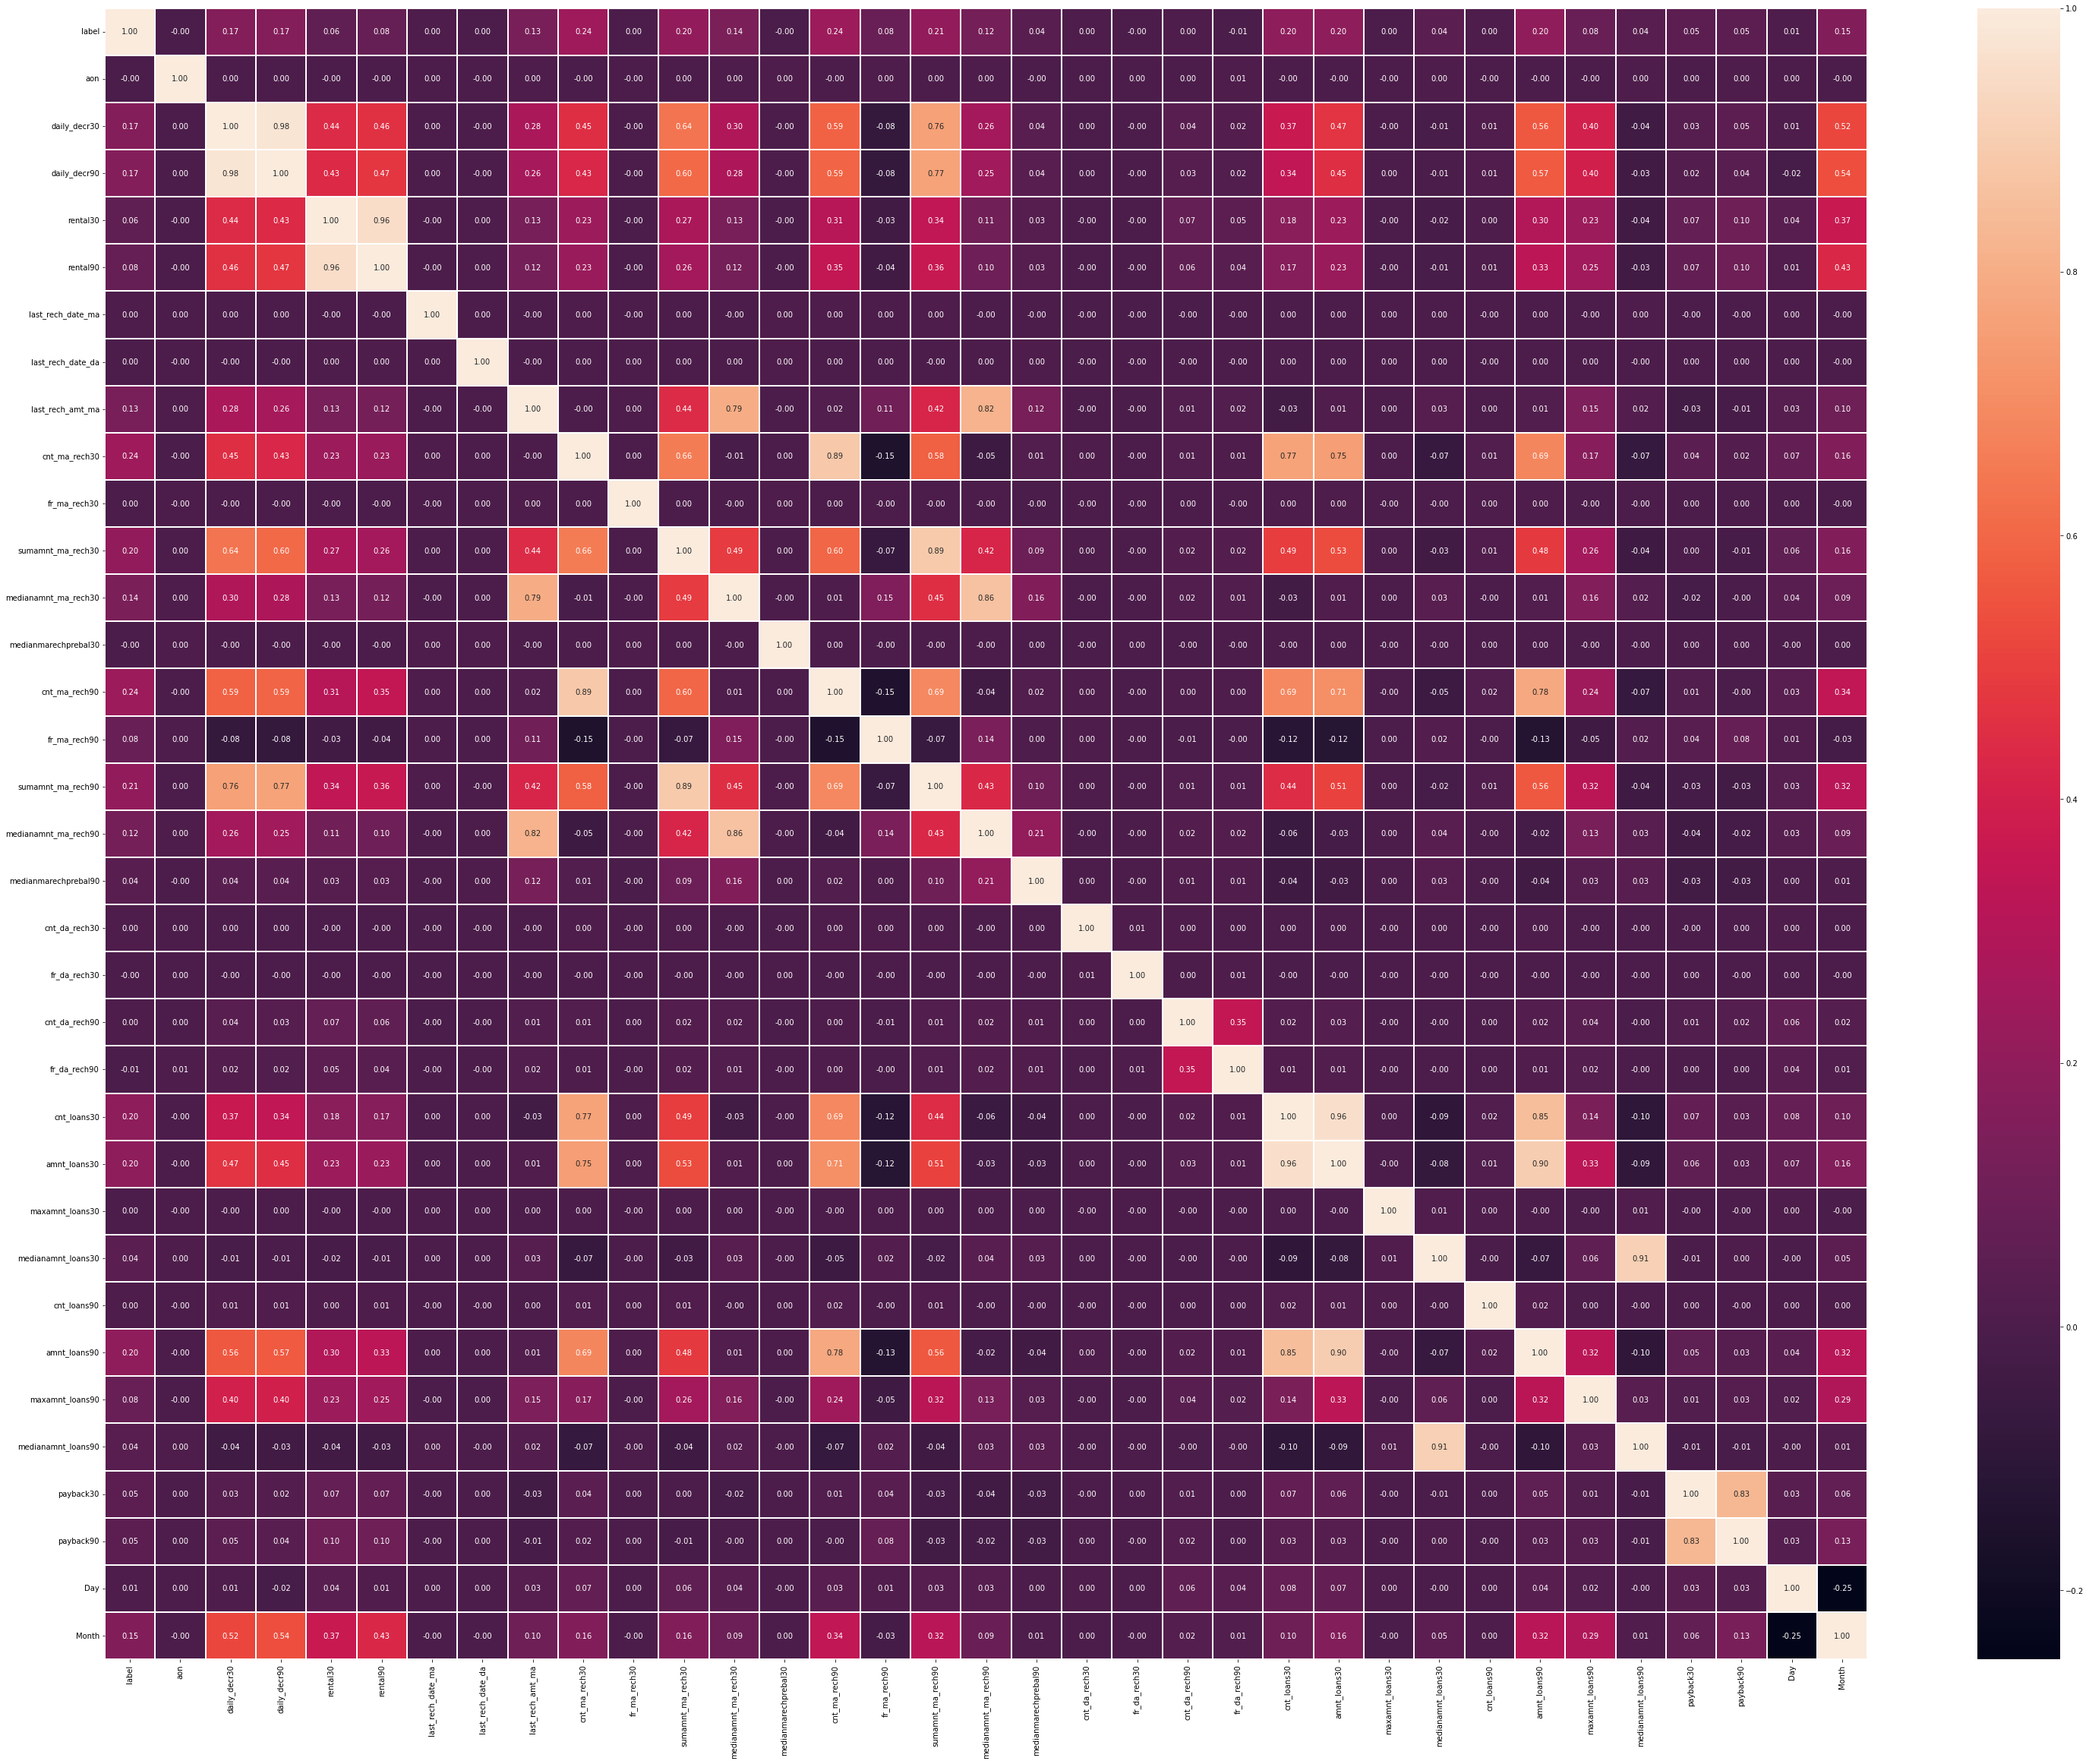

In [10]:
corr_metrix_heatmap = df.corr()
plt.figure(figsize = (52,40))
sns.heatmap(corr_metrix_heatmap,annot=True,linewidths=0.01,fmt="0.2f")
plt.show()

In [11]:
#finding which variable which is highly correlated and which one is Least correlated with label
corr_metrix_heatmap["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
Month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
Day                     0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

### Observation :
    Most highly correlated variable is : cnt_ma_rech30
    Least Correlated is                : fr_da_rech90

In [12]:
for i in x.columns:
    print(x[i].corr(y),"--",pearsonr(x[i],(y)),"--",x[[i]].skew())

-0.003785046879295284 -- (-0.003785046879296295, 0.08312400423944492) -- aon    10.392949
dtype: float64
0.1682978993999408 -- (0.16829789939998402, 0.0) -- daily_decr30    3.94623
dtype: float64
0.1661500043006332 -- (0.16615000430067606, 0.0) -- daily_decr90    4.252565
dtype: float64
0.05808455992687332 -- (0.05808455992688847, 4.6504388295136916e-156) -- rental30    4.521929
dtype: float64
0.07552058911412751 -- (0.07552058911414608, 1.1165555728596477e-262) -- rental90    4.437681
dtype: float64
0.003728215086215525 -- (0.0037282150862164225, 0.08785511765833912) -- last_rech_date_ma    14.790974
dtype: float64
0.001711036481335733 -- (0.0017110364813352056, 0.4334326896867056) -- last_rech_date_da    14.814857
dtype: float64
0.13180350306731575 -- (0.13180350306729335, 0.0) -- last_rech_amt_ma    3.781149
dtype: float64
0.2373311602519856 -- (0.2373311602520481, 0.0) -- cnt_ma_rech30    3.283842
dtype: float64
0.0013301978392493594 -- (0.001330197839249675, 0.542538442365745) -- 

In [13]:
#with help of following function we can select highly correlated features
#it will remoce the feature that is highlt correlated with any other feature

def correlation(dataset,threshold):
    col_corr=set() #set of all correlated columns
    corr_matrix = x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]#getting name of column
                col_corr.add(col_name)
    return col_corr

In [14]:
corr_feature = correlation(x,0.85)
len(set(corr_feature))

8

In [15]:
corr_feature

{'amnt_loans30',
 'amnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'rental90',
 'sumamnt_ma_rech90'}

In [16]:
#dropping highly correlated fetures
x_drop=x.drop(corr_feature,axis = 1)
print("After removing correlated feature",x_drop.shape)

After removing correlated feature (209593, 26)


In [17]:
#checking skewness of rst of columns
x_drop.skew()

aon                     10.392949
daily_decr30             3.946230
rental30                 4.521929
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
fr_ma_rech90             2.285423
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
maxamnt_loans90          1.678304
payback30                8.310695
payback90                6.899951
Day                      0.199845
Month                    0.343242
dtype: float64

In [18]:
#Scale the feaures between 1 - 2 for performing the power transformation bby using box-Cox method
scalar = MinMaxScaler(feature_range=(1, 2))
x_scaled = scalar.fit_transform(x_drop)

In [19]:
#Removing the otliers by using power transformation
power = PowerTransformer()
power = PowerTransformer(method ='box-cox', standardize=True)
x_new = pd.DataFrame(power.fit_transform(x_scaled))

In [20]:
#Skewness of data set after removing the ooutliers
x_new.skew()

0      6.021115
1      0.638691
2     -6.102815
3     13.992596
4     14.015921
5      0.296976
6      0.247301
7     14.026245
8      0.365094
9      0.226825
10     8.958154
11     0.669573
12    -0.116329
13    14.035513
14    14.042406
15     6.006577
16    15.469700
17     0.345339
18    13.618910
19     3.447735
20     3.277618
21    -0.309027
22     0.724592
23     0.696524
24    -0.014176
25     0.028219
dtype: float64

### Feature Importance

In [21]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [22]:
print(model.feature_importances_)

[0.05275454 0.1128672  0.1257463  0.04361706 0.04312006 0.03647314
 0.00321329 0.01911164 0.02844284 0.01455035 0.02643734 0.03198598
 0.02570376 0.04967622 0.02872533 0.03416989 0.03235386 0.03197791
 0.0023496  0.00165416 0.00309945 0.0007248  0.01524376 0.02448734
 0.0016349  0.00588    0.00664004 0.01277356 0.00269753 0.00571034
 0.01929536 0.01638461 0.08928237 0.05121544]


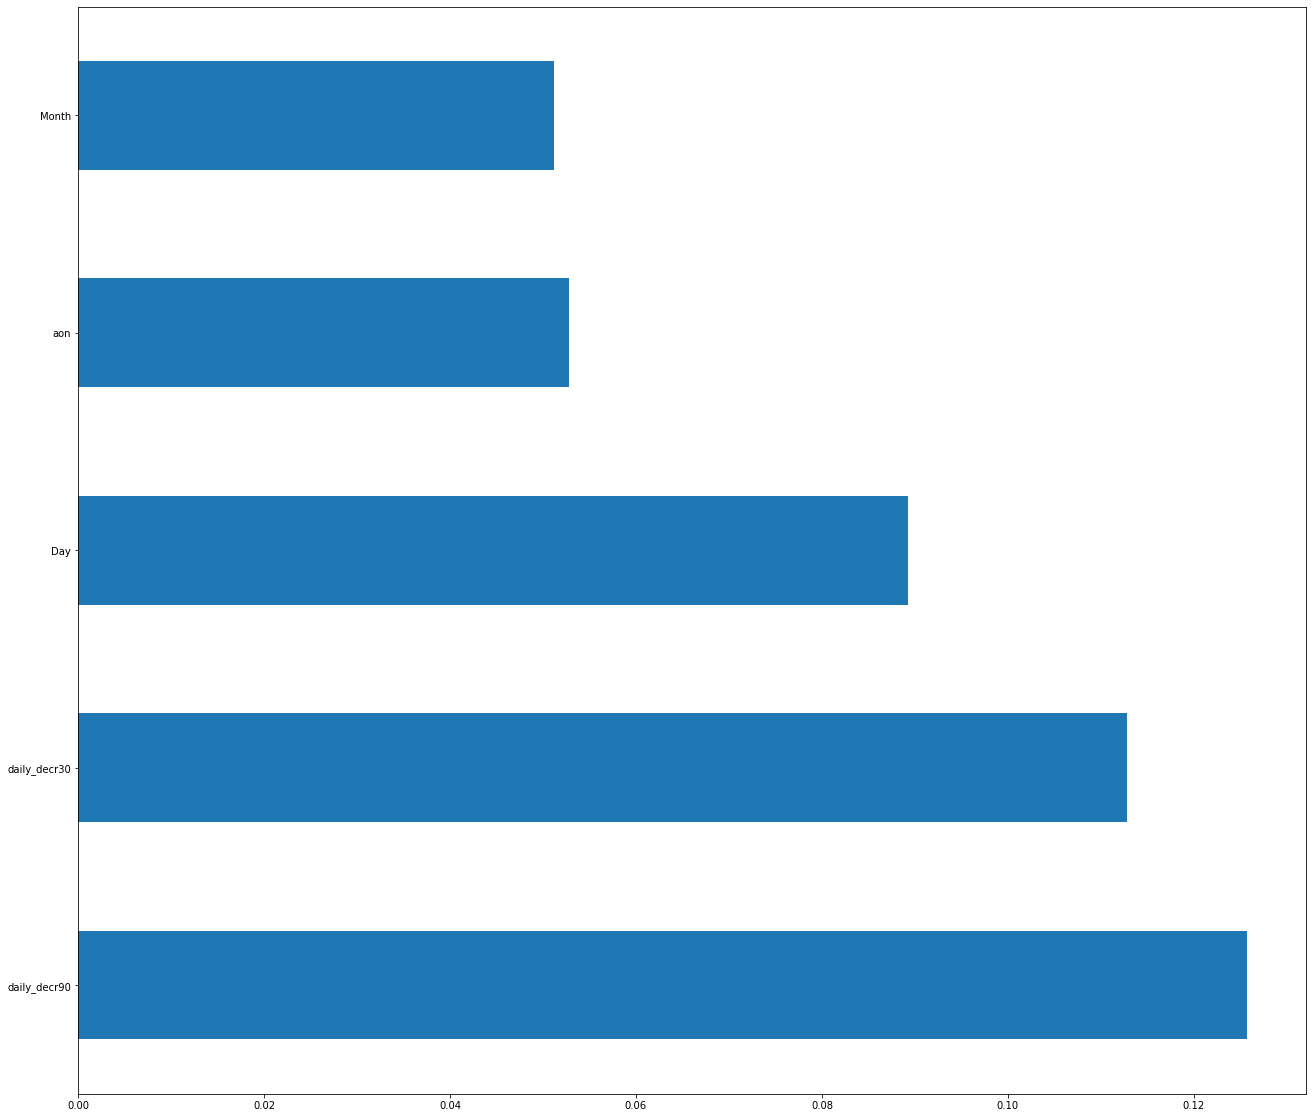

In [23]:
#PLoting graph of feature importance for better visualization
plt.figure(figsize = (22,20))
feature_importance = pd.Series(model.feature_importances_,index=x.columns)
fet_list = feature_importance.nlargest(5).plot(kind='barh')#Horizontal Bar
plt.show()

#### Sampling

In [24]:
y.shape

(209593,)

In [25]:
data = pd.concat([x,y],axis = 1)

In [26]:
print("Total 0's are =>",data['label'].value_counts()[0])
print("Total 1,s are =>",data['label'].value_counts()[1])

Total 0's are => 26162
Total 1,s are => 183431


In [27]:
x = data[data.label==0]
y = data[data.label==1]

In [28]:
#checking train and test counts in given data set
print("Failed to repay",x.shape)
print("Successfully repaid - ",y.shape)

Failed to repay (26162, 35)
Successfully repaid -  (183431, 35)


In [29]:
#dependant features
x=data.drop(columns = 'label')
print(x.shape)

(209593, 34)


In [30]:
#Targer Variable
y = data['label']
# y=y[2:]
print(y.shape)

(209593,)


In [31]:
#split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [32]:
#conacat train data features ad dependant variables
x=pd.concat([x_train,y_train],axis=1)

In [33]:
#shape after taking data for training 
unpaid_x=x[x.label==0]
paid_y=x[x.label==1]

print(unpaid_x.shape)
print(paid_y.shape)

(19629, 35)
(137565, 35)


In [34]:
#upsampling
label_upsampling = resample(unpaid_x,replace = True,n_samples = len(paid_y),random_state = 20)

In [35]:
label_upsampling.shape

(137565, 35)

In [36]:
#concat majority and upsampled minority
upsampled=pd.concat([label_upsampling,paid_y])

In [37]:
upsampled.shape

(275130, 35)

In [38]:
#seperating target and independant variables
y=upsampled['label']
x=upsampled.drop(columns = ['label'])

In [39]:
print(x.shape)
print(y.shape)

(275130, 34)
(275130,)


In [40]:
# Try wih DT algo. with it's default parameters

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=437)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

96.19270890124668


In [41]:
#Train & Test Accurecy of DT algo.
Train_accurecy = accuracy_score(y_train,dt.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)
print(Train_accurecy)
print(Test_accurecy)

0.9999818267727983
0.9619270890124668


In [42]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27390,    33],
       [ 2062, 25541]], dtype=int64)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27423
           1       1.00      0.93      0.96     27603

    accuracy                           0.96     55026
   macro avg       0.96      0.96      0.96     55026
weighted avg       0.96      0.96      0.96     55026



In [44]:
cv_score = cross_val_score(dt,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.9623523425289863 and accuracy for training is 0.9999818267727983 and accurecy for testing is 0.9619270890124668




#Try toimprove score by using
#### Applying ensembling tchniques

In [45]:
# Try wih Random forest algo. with it's default parameters
#By using stratify = y ,Because data is imbalanced in case of Target Variable

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=437)
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

98.08272453022208


In [46]:
Train_accurecy = accuracy_score(y_train,rf.predict(x_train))
Test_accurecy = accuracy_score(y_test,y_pred)
print(Train_accurecy)
print(Test_accurecy)

0.9999818267727983
0.9808272453022208


In [47]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[27400,    23],
       [ 1032, 26571]], dtype=int64)

In [48]:
cv_score = cross_val_score(rf,x,y,cv = 5)
cv_mean=cv_score.mean()
print(f"at cross foald {5} the cv score is {cv_mean} and accuracy for training is {Train_accurecy} and accurecy for testing is {Test_accurecy}")
print("\n")

at cross foald 5 the cv score is 0.980431068949224 and accuracy for training is 0.9999818267727983 and accurecy for testing is 0.9808272453022208




<AxesSubplot:xlabel='label', ylabel='Density'>

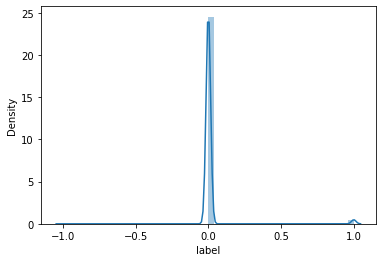

In [49]:
sns.distplot(y_test-y_pred)

In [56]:
from sklearn.metrics import roc_curve

In [61]:
auc = roc_auc_score(y_test,y_pred)
auc

0.9808870237263084

In [62]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

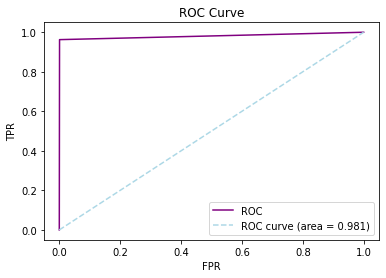

In [63]:
plt.plot(fpr,tpr,color='purple',label='ROC')
plt.plot([0,1],[0,1],color='lightblue',linestyle='--',label='ROC curve (area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Almost 98% area is covered by Curve

Model accurecy which we are getting 98.08% which shows that the model is performing well.
After making data balanced by using upsampling we are getting good results , so we are Continue  with same 

In [66]:
#Saving the model
import pickle
filename = 'paystatus.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion :

In [67]:
loaded_model = pickle.load(open('paystatus.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9808272453022208


In [68]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])

In [69]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,55016,55017,55018,55019,55020,55021,55022,55023,55024,55025
predicted,0,0,0,0,0,0,0,1,0,1,...,1,1,0,1,0,1,1,0,0,0
original,0,0,0,0,0,0,0,1,0,1,...,1,1,0,1,0,1,1,0,0,0


In [70]:
with pd.option_context("display.max_columns",8060,'display.max_colwidth',150):display(conclusion)

0      1      2      3      4      5      6      7      8      \
predicted      0      0      0      0      0      0      0      1      0   
original       0      0      0      0      0      0      0      1      0   

           9      10     11     12     13     14     15     16     17     \
predicted      1      0      0      0      1      0      1      0      0   
original       1      0      0      0      1      0      1      0      0   

           18     19     20     21     22     23     24     25     26     \
predicted      0      0      0      1      1      0      0      1      1   
original       0      0      0      1      1      0      0      1      1   

           27     28     29     30     31     32     33     34     35     \
predicted      0      0      0      0      1      1      0      1      0   
original       0      0      0      0      1      1      0      1      0   

           36     37     38     39     40     41     42     43     44     \
predicted      0      1      0      1      1      1      0      0      0   
original       0      1      0      1      1      1      0      0      0   

           45     46     47     48     49     50     51     52     53     \
predicted      0      1      0      1      1      1      1      0      0   
original       0      1      0      1      1      1      1      0      0   

           54     55     56     57     58     59     60     61     62     \
predicted      0      0      1      1      0      1      0      0      0   
original       0      0      1      1      0      1      0      0      0   

           63     64     65     66     67     68     69     70     71     \
predicted      1      0      1      1      1      1      0      0      0   
original       1      0      1      1      1      1      0      0      0   

           72     73     74     75     76     77     78     79     80     \
predicted      0      1      0      0      0      1      0      0      0   
original       0      1      0      0      0      1      0      0      0   

           81     82     83     84     85     86     87     88     89     \
predicted      1      0      1      0      1      1      0      0      0   
original       1      0      1      0      1      1      0      0      0   

           90     91     92     93     94     95     96     97     98     \
predicted      0      1      1      0      1      1      0      1      1   
original       0      1      1      0      1      1      0      1      1   

           99     100    101    102    103    104    105    106    107    \
predicted      1      0      0      0      0      1      1      1      1   
original       1      0      0      0      0      1      1      1      1   

           108    109    110    111    112    113    114    115    116    \
predicted      1      0      0      1      1      1      1      0      0   
original       1      0      0      1      1      1      1      0      0   

           117    118    119    120    121    122    123    124    125    \
predicted      0      0      1      1      1      1      0      0      1   
original       0      0      1      1      1      1      0      0      1   

           126    127    128    129    130    131    132    133    134    \
predicted      1      1      0      1      0      0      0      0      1   
original       1      1      0      1      0      0      0      0      1   

           135    136    137    138    139    140    141    142    143    \
predicted      1      1      0      0      1      0      1      1      1   
original       1      1      0      0      1      0      1      1      1   

           144    145    146    147    148    149    150    151    152    \
predicted      0      1      1      1      1      1      1      0      1   
original       0      1      1      1      1      1      1      0      1   

           153    154    155    156    157    158    159    160    161    \
predicted      0      1      1      1     